# Homework 1
## 1. Banknote anthentication Dataset

Data were extracted from images that were taken from genuine and forged banknote- like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### (a) Download the Skin Segmentation data from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.

In [261]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [262]:
df=pd.read_csv("data/data_banknote_authentication.txt",sep=",",header=None, 
               names=['variance','skewness','curtosis','entropy','class'])
print(df.head(10))
#df.loc[:,'variance':'entropy']
#df.iloc[:3, :2]

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


### (b) Pre-Processing and Exploratory data analysis
#### i. Make scatterplots of the independent variables in the dataset.

Below is a scatterplot matrix.

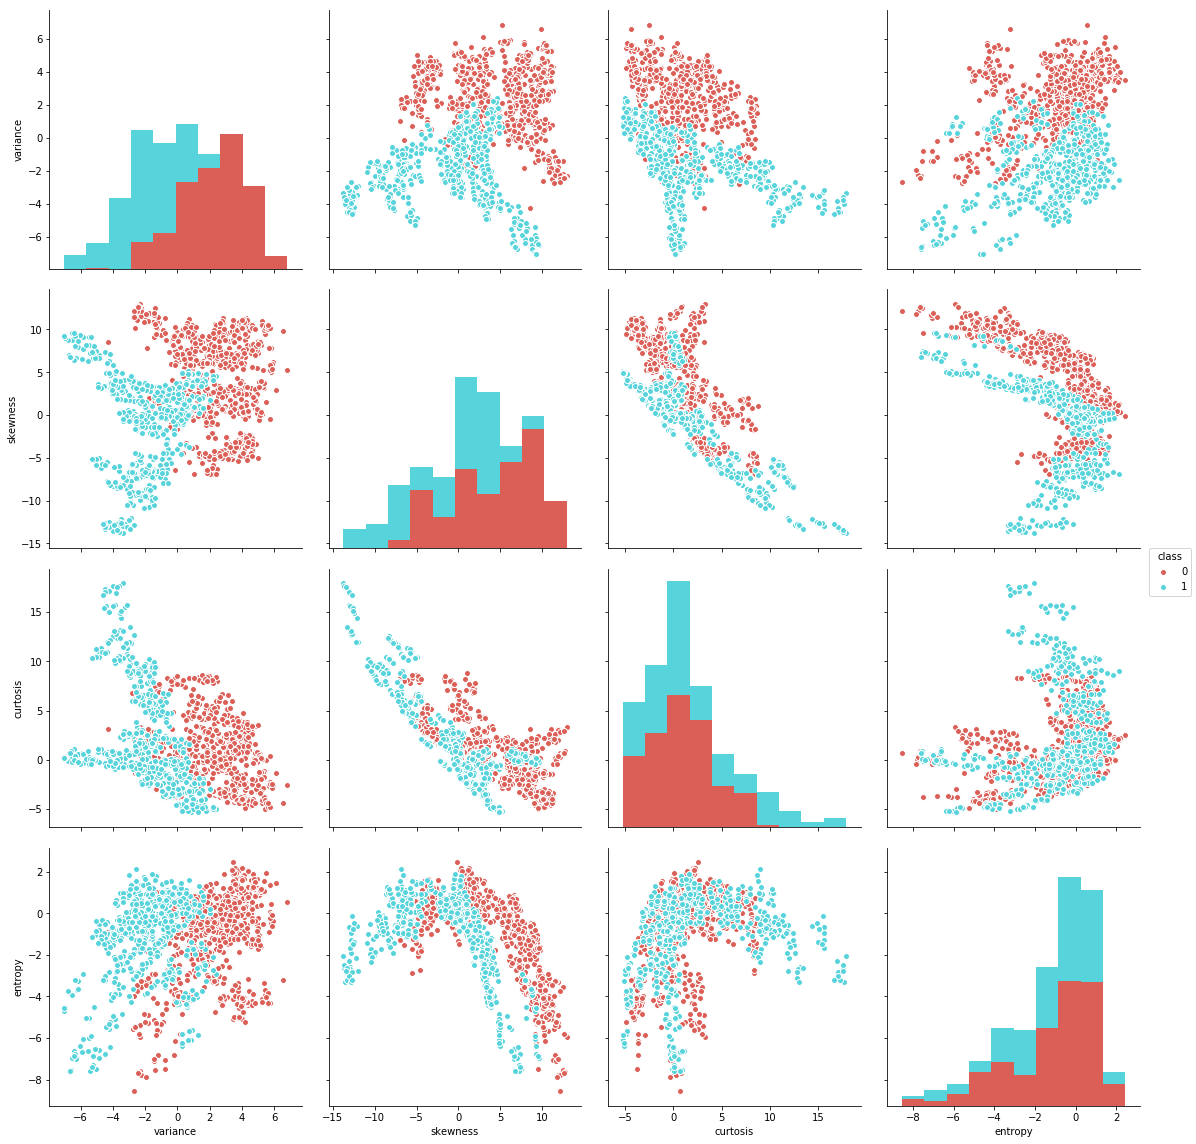

In [186]:
sb.pairplot(df, vars=['variance','skewness','curtosis','entropy'], hue="class",
            palette='hls', size=4)

#### ii. Make boxplots for each of the independent variables.

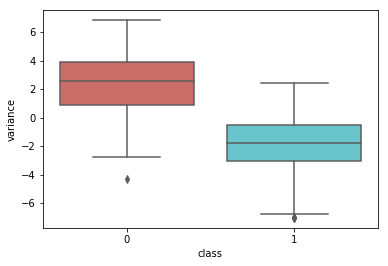

In [187]:
sb.boxplot(x='class', y='variance', data=df, palette='hls')

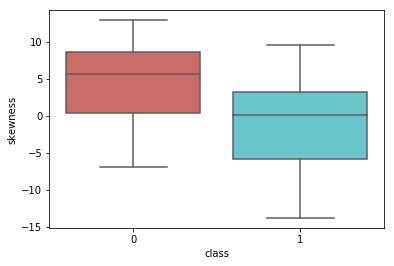

In [188]:
sb.boxplot(x='class', y='skewness', data=df, palette='hls')

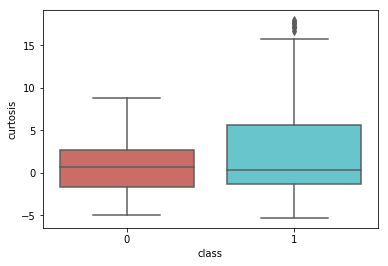

In [189]:
sb.boxplot(x='class', y='curtosis', data=df, palette='hls')

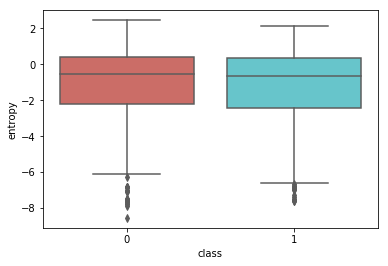

In [190]:
sb.boxplot(x='class', y='entropy', data=df, palette='hls')

#### iii. Split dataset into test set and training set

Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [263]:
class0 = df.loc[df['class'] == 0]
class1 = df.loc[df['class'] == 1]
print(class0.shape)
print(class1.shape)

(762, 5)
(610, 5)


We have We 762 rows of Class 0 and 610 rows of Class 1 in the dataset.

In [264]:
test = pd.concat([class0.head(200), class1.head(200)])
train = pd.concat([class0.iloc[200:], class1.iloc[200:]])

We have 762 - 200 = 562 rows of Class 0 and 610 - 400 = 410 rows of Class 1 in the training set.

### (c) Classification using KNN
#### i. Write code for k-nearest neighbors with Euclidean metric

In [193]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics

In [265]:
X_train = train.iloc[:,0:4].values
y_train = train['class'].values
X_test = test.iloc[:,0:4].values
y_test = test['class'].values

In [266]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [267]:
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400

1.0


#### ii. Finding the best k

In [197]:
train_error = []
test_error = []
nums = range(1, 902, 3)

for k in nums:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_error.append(1 - metrics.accuracy_score(y_train, train_pred))
    test_error.append(1 - metrics.accuracy_score(y_test, test_pred))


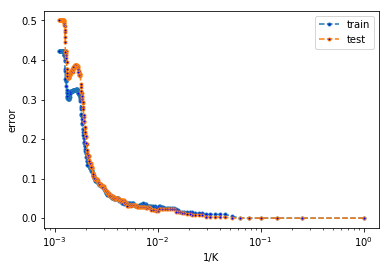

In [198]:
nums_inversed = 1. / np.array(nums)
plt.plot(nums_inversed, train_error, ls='dashed', marker='.',
         markerfacecolor='blue', label='train')
plt.plot(nums_inversed, test_error, ls='dashed', marker='.',
         markerfacecolor='blue', label='test')
plt.xlabel('1/K')
plt.ylabel('error')
plt.xscale('log')
plt.legend()

For k = 1, 4, 7, 10, 13, 16, both train error and test error are 0. Normally, we choose k from 5 to 10. So I choose the optimal k as 7.

In [274]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, test_pred))

confusion_matrix:
[[200   0]
 [  0 200]]


In [275]:
print(metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400



As shown above, the true positive rate (recall) is 1.00, the true negative rate is 1.00, precision is 1.00, and F-score is 1.00.

#### iii. Learning Curve
When N = 850 or 900, we cannot select N/2 rows of Class 1 out of the training set in last question, because the training set only has 410 rows of Class 1. So we have to append more rows of Class 0.

In [199]:
best_errors = []
for n in range(50,901,50):
    if(n < 850):
        train1 = pd.concat([class0.iloc[200:200+n//2], class1.iloc[200:200+n//2]])
    else:
        train1 = pd.concat([class0.iloc[200:200+n-410], class1.iloc[200:]])
    X_train = train1.iloc[:,0:4].values
    y_train = train1['class'].values
    error = []
    for k in range(1,n,40):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error.append(1 - metrics.accuracy_score(y_test, y_pred))
    best_errors.append(min(error))

Text(0.5,1,'learning curve')

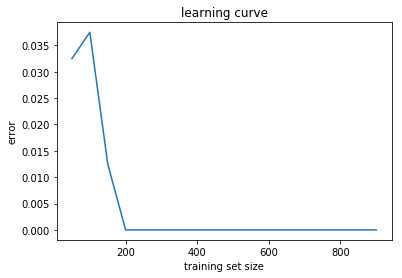

In [200]:
plt.plot(range(50,901,50), best_errors)
plt.xlabel('training set size')
plt.ylabel('error')
plt.title('learning curve')

### (d) Change the distance metric
#### i. Minkowski Distance
A. Manhattan Distance

In [201]:
X_train = train.iloc[:,0:4].values
y_train = train['class'].values

In [202]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
errors = np.array(errors)
#get the k with the minimum error
k_opt = np.argmin(errors) * 10 + 1
print('The best k is', k_opt)

The best k is 1


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [203]:
errors = []
log_p_array = np.arange(0.1,1.1,0.1)
for l in log_p_array:
    p = 10 ** l
    knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
errors = np.array(errors)
log_p_opt = np.argmin(errors) * 0.1 + 0.1
print(log_p_opt)

0.1


The best log<sub>10</sub>(P) is 0.1.

C. Chebyshev Distance

In [205]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
errors = np.array(errors)
k_opt = np.argmin(errors) * 10 + 1
print('The best k is', k_opt)

The best k is 1


#### ii. Mahalanobis Distance

In [206]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',
                              metric_params={'V': np.cov(X_train, rowvar=False)})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
errors = np.array(errors)
k_opt = np.argmin(errors) * 10 + 1
print('The best k is', k_opt)

The best k is 1


### (e) Using weighted voting

Euclidean Distance:

In [207]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
print('The best test error is', min(errors))

The best test error is 0.0


Manhattan Distance:

In [208]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
print('The best test error is', min(errors))

The best test error is 0.0


Chebyshev Distance:

In [209]:
errors = []
for k in range(1,902,10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - metrics.accuracy_score(y_test, y_pred))
print('The best test error is', min(errors))

The best test error is 0.0


### (f)
The lowest training error rate I achieved in this exercise is 0.

## 2. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

### (a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [210]:
#load the data
df2 = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')
df2.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data
### i.

In [211]:
df2.shape

(9568, 5)

There are 9568 rows and 5 clolums in this data set. Each row represents a data point. The first 4 Columns are predictors. The last row (PE) is the response.

### ii. Scatterplots

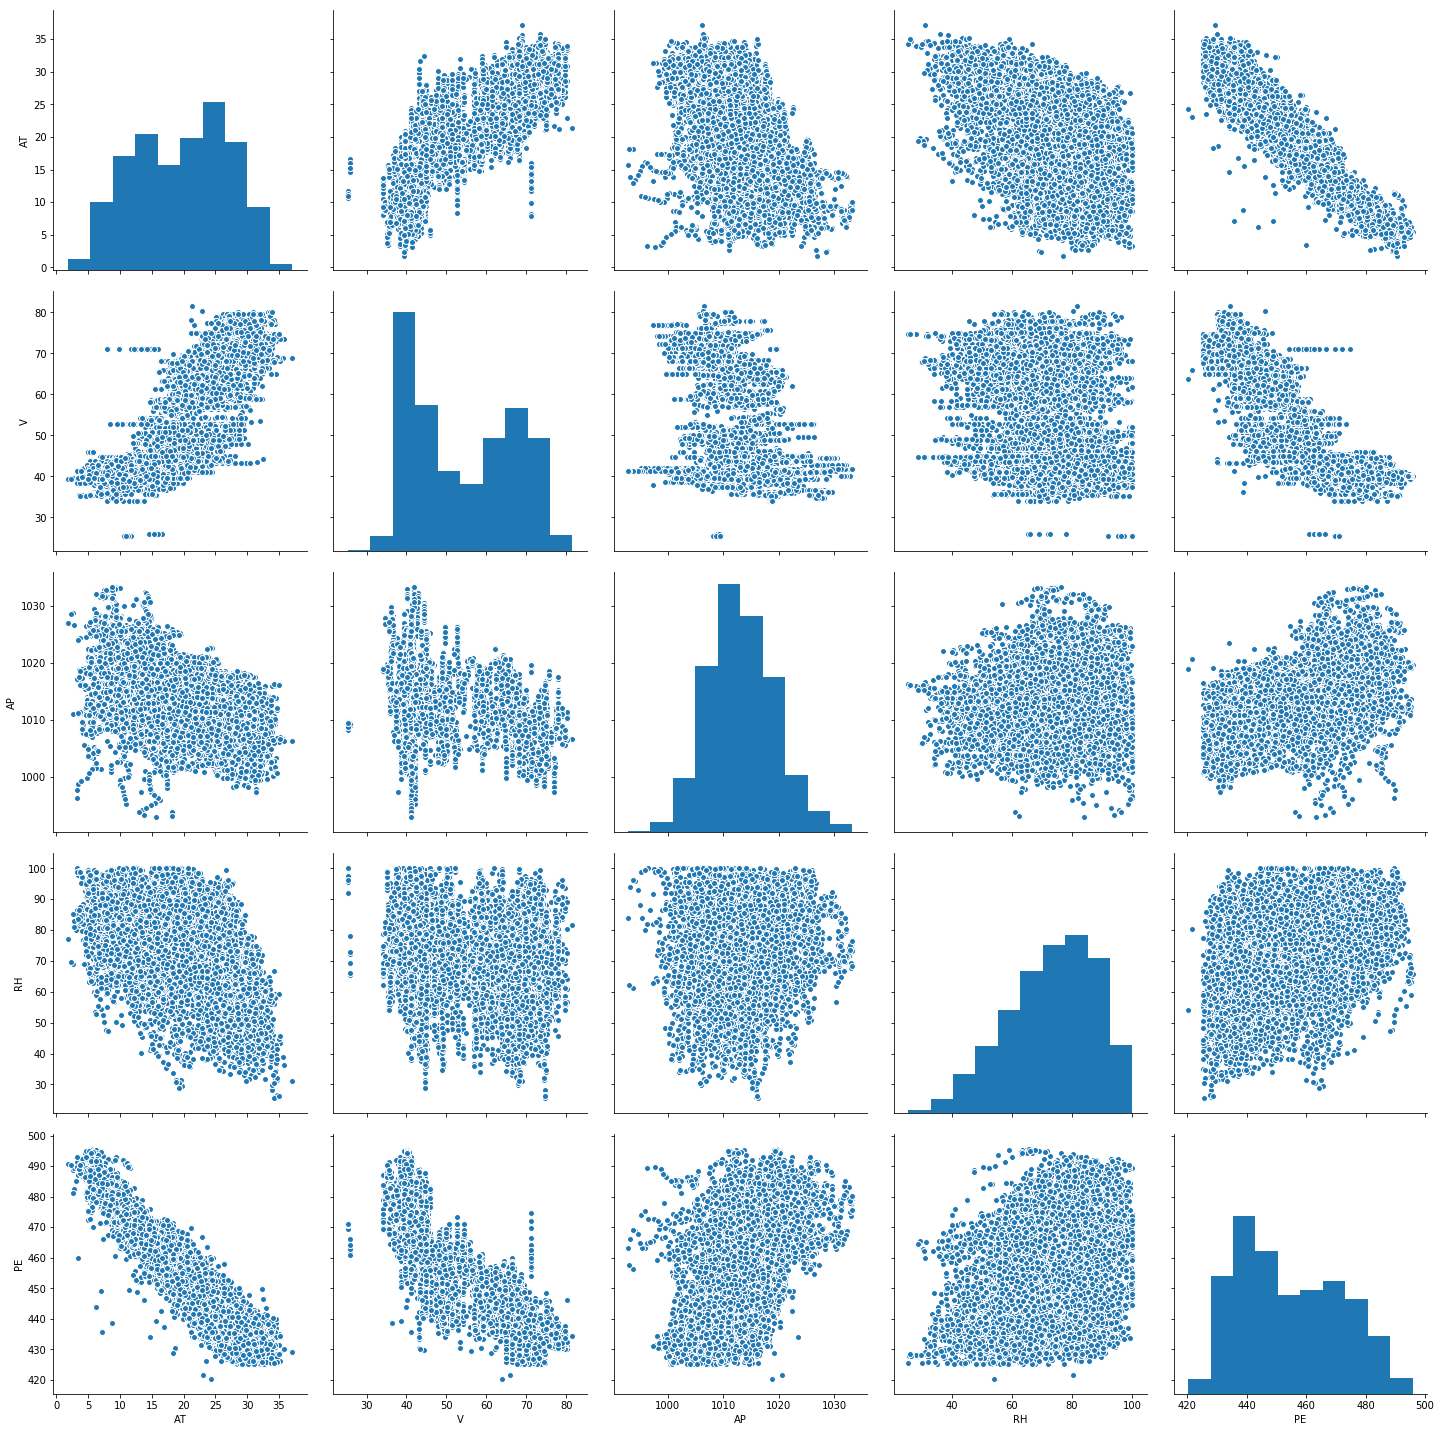

In [212]:
sb.pairplot(df2, size=4)

It seems that PE and AT have a negative correlation, and PE and V have a negative correlation, and AT and V have a positive correlation.

### iii. Summary statistics

In [213]:
stat = df2.describe()
stat1 = stat.loc[['mean', '50%', '25%', '75%']]

In [214]:
range_ = stat.loc['max'] - stat.loc['min']
interquartile_range = stat.loc['75%'] - stat.loc['25%']
stat1.loc['range'] = range_
stat1.loc['interquartile range'] = interquartile_range

The statistics table is as below:

In [215]:
stat1

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Fitting a simple linear regression model for each predictor

For each predictor X, fit a model of the form
$$ Y =
Y =β0 +β1X+β2X2 +β3X3 +ε


#### Ambient Temperature (AT)

In [216]:
import statsmodels.api as sm

In [217]:
x = df2['AT']
y = df2['PE']
X = sm.add_constant(x) #add an intercept to our model
model = sm.OLS(y,X).fit()
print(model.summary())
# make predictions by the model
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:25   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

From the summary above, we can see that the p-values of AT and intercept are both very small and very close to 0. So we can reject the null hypothsis.

The R<sup>2</sup> statistic is 0.89, which is close to 1. And the F-statistic is very large. We can say that there a statistically significant association between the predictor AT and the response.

The least squared line is shown in the picture below. The model fits the data well.

Text(0,0.5,'PE')

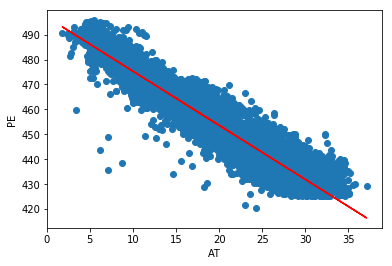

In [218]:
plt.scatter(x, y)
plt.plot(x, pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

#### Ambient Pressure (AP)

In [219]:
x = df2['AP']
y = df2['PE']
X = sm.add_constant(x) #add an intercept to our model
model = sm.OLS(y,X).fit()
print(model.summary())
# make predictions by the model
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:25   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

We can see that the p-values of variable AP and intercept are both very small and very close to 0. So we can say the predictor AP is significant. 

But the R<sup>2</sup> statistic is 0.269, which is close to 0. And from the piture below we can see that the model cannot fit the relationship between AT and PE quite well. So there are some other variables that also affect the response.

Text(0,0.5,'PE')

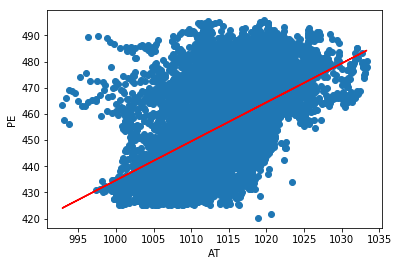

In [220]:
plt.scatter(x, y)
plt.plot(x, pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

#### Relative Humidity

In [221]:
x = df2['RH']
y = df2['PE']
X = sm.add_constant(x) #add an intercept to our model
model = sm.OLS(y,X).fit()
print(model.summary())
# make predictions by the model
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:26   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

We can see that the p-values of RH and intercept are both very small and very close to 0. So we can say the predictor AP is significant. 

But the R<sup>2</sup> statistic is 0.152, which is close to 0. And from the piture below we can see that the model cannot fit the relationship between AT and PE quite well. So there are some other variables that also affect the response.

Text(0,0.5,'PE')

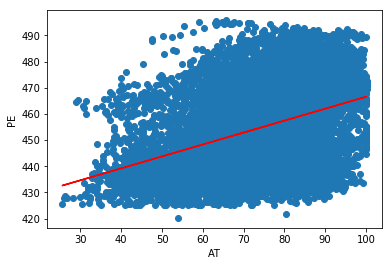

In [222]:
plt.scatter(x, y)
plt.plot(x, pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

#### Exhaust Vacuum (V)

In [223]:
x = df2['V']
y = df2['PE']
X = sm.add_constant(x) #add an intercept to our model
model = sm.OLS(y,X).fit()
print(model.summary())
# make predictions by the model
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:26   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

We can see that the p-values of variable AP and intercept are both very small and very close to 0. So we can say the predictor AP is significant. 

But the R<sup>2</sup> statistic is 0.759. And from the piture below we can see that the model can fit the data well in some sense.

Text(0,0.5,'PE')

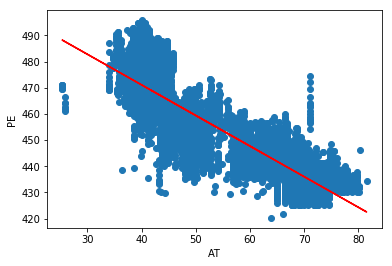

In [224]:
plt.scatter(x, y)
plt.plot(x, pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

There are some outliers to the left of the population and some outliers to the upperright of the population.

### (d) Fitting a multiple regression model using all of the predictors

In [225]:
X = df2.iloc[:, :4]
y = df2['PE']
X = sm.add_constant(X) #add an intercept to our model
multi_mod = sm.OLS(y,X).fit()
print(multi_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [226]:
type(multi_mod.params)

pandas.core.series.Series

The p-values of all predictors and intercept are 0.000, so we can reject the null hypothsis for all predictors.

The R<sup>2</sup> of this model is 0.929, which is close to 1 and better than that of any simple regression model above. so the multiple regression model fits the data well.

### (e) Comparing results from 2c to results from 2d

The R<sup>2</sup> of the multiple linear regression model is better than R<sup>2</sup> of any simple linear regression. So the multiple regression model provides a better fit.

Text(0,0.5,'multiple regression coefficients')

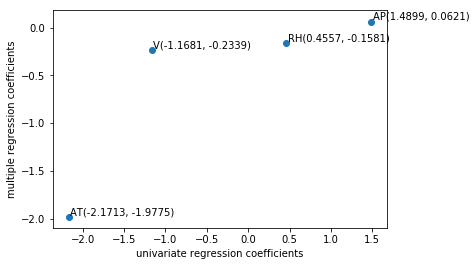

In [286]:
#plot the multiple regression coefficients against the univariate regression coefficients
multi_coefs = round(multi_mod.params[1:],4)
uni_coefs = [-2.1713, -1.1681, 1.4899, 0.4557]
labels = ['AT','V','AP','RH']

fig, ax = plt.subplots()
ax.scatter(uni_coefs, multi_coefs)
for i, txt in enumerate(labels):
    ax.annotate(txt+str((uni_coefs[i], multi_coefs[i])), (uni_coefs[i]+0.02,multi_coefs[i]+0.02))
plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')

### (f) Nonlinear association between predictors and the response

For each predictor X, fit a model of the form
$$Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$$

#### Ambient Temperature (AT)

In [228]:
x1 = df2['AT']
y = df2['PE']
X1 = np.vander(x1, 4) # add a constant, quadratic term, and cubic term
model1 = sm.OLS(y,X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:26   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0027      0.000     22.594      0.0

From above we can get $$\hat{\beta_3}=0.0027,\hat{\beta_2}=-0.1251,\hat{\beta_1}=-0.6103,\hat{\beta_0}=-492.7281$$

The p-values for all the terms are 0.000, which means all the terms are significant. And the R<sup>2</sup> is 0.912, compared to 0.899 for the simple linear model. This model provides a slightly better fit.

The polynomial curve of the model is shown in the figure below. We can see that the model fits the data well.

So there is nonlinear association between the predictor AT and the response.

Text(0,0.5,'PE')

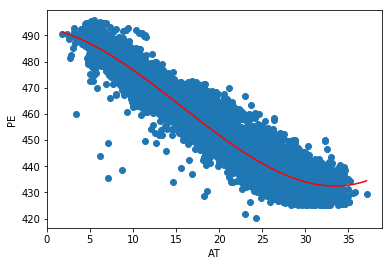

In [229]:
plt.scatter(x1, y)
#plot the polynomial curve
xvals = np.arange(min(x1), max(x1), 0.01)
y_pred = model1.predict(np.vander(xvals, 4))
# y_poly = 0.0027 * xvals**3 - 0.1251 * xvals**2 - 0.6103 * xvals + 492.7281
plt.plot(xvals, y_pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

#### Ambient Pressure (AP)

In [230]:
x2 = df2['AP']
y = df2['PE']
X2 = np.vander(x2, 4) # add a constant, quadratic term, and cubic term
model2 = sm.OLS(y,X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:26   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.514e-05   2.92e-06      8.613      0.0

The p-values for all the terms are 0.000, which means there is a nonlinear association between the predictor AP and the response PE. 

The polynomial curve of the model is shown in the figure below. We can see that the model is not a good fit.

Text(0,0.5,'PE')

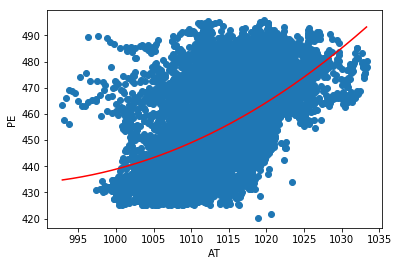

In [231]:
plt.scatter(x2, y)
#plot the polynomial curve
xvals = np.arange(min(x2), max(x2), 0.01)
y_pred = model2.predict(np.vander(xvals, 4))
plt.plot(xvals, y_pred, c='red')
plt.xlabel('AT')
plt.ylabel('PE')

#### Relative Humidity (RH)

In [232]:
x = df2['RH']
y = df2['PE']
X = np.vander(x, 4) # add a constant, quadratic term, and cubic term
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:27   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0002   3.51e-05     -4.340      0.0

The p-values for all the terms are 0.000, which means there is a nonlinear association between the predictor RH and the response PE. 

Text(0,0.5,'PE')

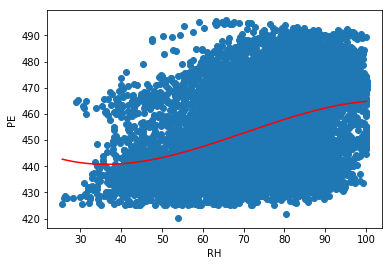

In [233]:
plt.scatter(x, y)
#plot the polynomial curve
xvals = np.arange(min(x), max(x), 0.01)
y_pred = model.predict(np.vander(xvals, 4))
plt.plot(xvals, y_pred, c='red')
plt.xlabel('RH')
plt.ylabel('PE')

The p-values for all the terms are 0.000, which means there is a nonlinear association between the predictor AP and PE. 

The polynomial curve of the model is shown in the figure below. We can see that the model is not a good fit.

#### Exhaust Vacuum (V)

In [234]:
x = df2['V']
y = df2['PE']
X = np.vander(x, 4) # add a constant, quadratic term, and cubic term
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:27   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001   5.45e-05      2.465      0.0

The p-value for the cubic term is 0.014 < 0.05. The p-value for the quadratic term is 0.768, which is too large. So the cubic term is significant, and the quardratic term is not significant.

Text(0,0.5,'PE')

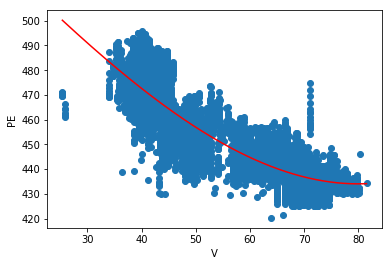

In [235]:
plt.scatter(x, y)
#plot the polynomial curve
xvals = np.arange(min(x), max(x), 0.01)
y_pred = model.predict(np.vander(xvals, 4))
plt.plot(xvals, y_pred, c='red')
plt.xlabel('V')
plt.ylabel('PE')

### (g) Full linear regression model with all pairwise interaction terms

In [236]:
from sklearn.preprocessing import PolynomialFeatures

In [238]:
#add all pairwise interaction terms
X = df2.iloc[:,:4]
names = ['AT', 'V', 'AP', 'RH']
for i in range(0,4):
    for j in range(0,i):
        label = names[i] + '_' + names[j]
        X[label] = X[names[i]] * X[names[j]]
X = sm.add_constant(X) #add an intercept to our model
X.head()

,const,AT,V,AP,RH,V_AT,AP_AT,AP_V,RH_AT,RH_V,RH_AP
0,1.0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,42765.1632,1094.6232,3055.5792,74931.2019
1,1.0,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,64221.7184,1487.6344,3719.6768,60263.9632
2,1.0,5.11,39.40,1012.16,92.14,201.3340,5172.1376,39879.1040,470.8354,3630.3160,93260.4224
3,1.0,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,57906.9568,1598.7104,4393.0048,77424.7936
4,1.0,10.82,37.50,1009.23,96.62,405.7500,10919.8686,37846.1250,1045.4284,3623.2500,97511.8026


In [239]:
y = df2['PE']
#fit the model
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:27   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

For V×AT, AP×V, RH×AT terms, their p-values are 0.000. For RH×AP, its p-value is 0.034 < 0.05. So V×AT, AP×V, RH×AT and RH×AP terms are significant.

### (h) Improve the model using possible interaction terms or nonlinear asso- ciations between the predictors and response.

In [240]:
from sklearn.model_selection import train_test_split
df2 = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')

In [288]:
#split into train and test
train, test = train_test_split(df2, test_size=0.3, random_state=66)
print(train.head())
print(test.head())

         AT      V       AP     RH      PE
6753  20.60  44.58  1017.67  48.36  466.20
3799  25.13  51.95  1005.42  62.05  447.70
10    17.99  43.72  1008.64  75.04  453.02
8645   8.90  40.77  1011.67  90.26  479.18
6805  16.26  38.58  1016.04  76.70  462.54
         AT      V       AP      RH      PE
5291  27.88  75.23  1011.33   58.91  439.33
8682  15.34  41.96  1012.08  100.12  468.33
6974  24.35  70.04  1010.92   73.88  438.40
8862   6.65  38.50  1014.01   87.60  491.54
8955  22.57  68.30  1017.43   87.69  440.81


#### Model 1:
Train the regression model on the training set with all predictors.

In [242]:
X_train = train.iloc[:, :4]
y_train = train['PE']
X_test = test.iloc[:, :4]
y_test = test['PE']
X_train = sm.add_constant(X_train) #add an intercept to our model
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.196e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -19629.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.0634     11.620     39.076      0.0

In [243]:
#Compute train and test MSEs
train_pred = model.predict(X_train)
train_err = np.mean((y_train - train_pred)**2)
print('The train MSE is', train_err)
test_pred = model.predict(X_test)
test_err = np.mean((y_test - test_pred)**2)
print('The test MSE is', test_err)

The train MSE is 20.576361724621247
The test MSE is 21.247260604299083


#### Model 2
Use all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values.

In [244]:
#add interaction terms and quadratic terms
poly = PolynomialFeatures(degree=2)
X_train = train.iloc[:,0:4]
X_train = pd.DataFrame(poly.fit_transform(X_train),
                      columns=['intercept','AT','V','AP','RH','AT_2','AT_V','AT_AP',
                               'AT_RH','V_2','V_AP','V_RH','AP_2','AP_RH','RH_2'])
y_train = train['PE'].values
X_test = test.iloc[:,0:4]
X_test = pd.DataFrame(poly.fit_transform(X_test),
                      columns=['intercept','AT','V','AP','RH','AT_2','AT_V','AT_AP',
                               'AT_RH','V_2','V_AP','V_RH','AP_2','AP_RH','RH_2'])
y_test = test['PE'].values
#fit the model
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7236.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -19178.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6682   BIC:                         3.849e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7014.2963   1426.977     -4.915      0.0

The p-value of ATxAP term is 0.417, which means this term is not significant. Remove ATxAP term and train again.

In [245]:
X_train = X_train.drop(columns=['AT_AP'])
#fit the model
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7793.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -19178.
No. Observations:                6697   AIC:                         3.838e+04
Df Residuals:                    6683   BIC:                         3.848e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7568.8367   1252.577     -6.043      0.0

With p-value of 0.187, VxRH term is not significant. Remove it and train again.

In [246]:
X_train = X_train.drop(columns=['V_RH'])
#fit the model
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8441.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -19179.
No. Observations:                6697   AIC:                         3.838e+04
Df Residuals:                    6684   BIC:                         3.847e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7660.8444   1250.790     -6.125      0.0

According to the p-value, V<sup>2</sup> term is not significant. Remove it and train again.

In [247]:
X_train = X_train.drop(columns=['V_2'])
#fit the model
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9205.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -19181.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6685   BIC:                         3.847e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7817.2869   1247.851     -6.265      0.0

All the p-values are 0.00, so all the terms left are significant. So this model is the final model.

In [248]:
#Compute train and test MSEs
train_pred = model.predict(X_train)
train_err = np.mean((y_train - train_pred)**2)
print('The train MSE is', train_err)
X_test = X_test.drop(columns = ['AT_AP','V_RH', 'V_2'])
test_pred = model.predict(X_test)
test_err = np.mean((y_test - test_pred)**2)
print('The test MSE is', test_err)

The train MSE is 17.99918499183877
The test MSE is 18.41415669123318


### (i) KNN Regression

In [249]:
from sklearn.neighbors import KNeighborsRegressor

In [289]:
X_train = train.iloc[:,:4]
y_train = train['PE']
X_test = test.iloc[:,:4]
y_test = test['PE']
train_errs = []
test_errs = []
# R_squareds = []
kvals = range(1, 101)
for k in kvals:
    knnReg = KNeighborsRegressor(n_neighbors=k)
    knnReg.fit(X_train, y_train)
    train_pred = knnReg.predict(X_train)
    train_errs.append(np.mean((y_train - train_pred)**2))
    test_pred = knnReg.predict(X_test)
    test_errs.append(np.mean((y_test - test_pred)**2))
#     R_squareds.append(knnReg.score(X_test, y_test))

In [292]:
best_k = np.argmin(test_errs) + 1
print("When k = " + str(best_k) + ", the test error achieves its minimum", test_errs[best_k-1])

When k = 6, the test error achieves its minimum 15.783874324664275


k = 6 gives us the best fit.

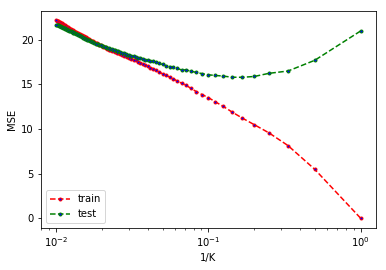

In [252]:
#Plot the train and test errors in terms of 1/k.
kvals_inversed = 1. / np.array(kvals)
plt.plot(kvals_inversed, train_errs, color='red',ls='dashed', marker='.', 
         markerfacecolor='blue', label='train')
plt.plot(kvals_inversed, test_errs, color='green', ls='dashed', marker='.', 
         markerfacecolor='blue', label='test')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

### (j) Compare the results of KNN Regression with linear regression

The best fit of KNN Regression has test MSE of 15.7838, while the second model in 2(h) gives 18.4141. KNN Regression does a little better. The sample size is 9500+ and the number of predictor is relatively small, so the KNN Regression can do a decent job. The linear regression model after including interation terms and quadratic nonlinearities is also not bad. But the KNN Regression is more flexible than linear regression, which may lead to the difference of performance.

## 3. ISLR: 2.4.1
(a) Better. Because a flexible method will fit the data closer. With a large sample size and a small number of predictors, the bias of the inflexbible method might be too high. So The flexible method can provide a better fit to the data.

(b) Worse. With extremely large p and a small sample size, a flexible method would overfit the data.

(C) Better. A flexible method can fit a curve with more degrees of freedom to the data. Since the relationship between predictors and reponse is highly non-linear, a flexible method would gives a better fit.

(d) Worse. If the variance of the error terms is very high, a flexible method could overfit easily, and gives a poor fit.

## 4. ISLR: 2.4.7
(a) 

In [253]:
df = pd.DataFrame([[0,3,0,'Red'],
                   [2,0,0,'Red'],
                   [0,1,3,'Red'],
                   [0,1,2,'Green'],
                   [-1,0,1,'Green'],
                   [1,1,1,'Red']],
                  index=[1,2,3,4,5,6],
                  columns=['X1','X2','X3','Y'])

In [254]:
from scipy.spatial import distance

In [255]:
#compute the Euclidean distance between each observation and thetestpoint
test_point = [0,0,0]
distances = []
for i in range(0,6):
    distances.append(distance.euclidean(df.iloc[i,0:3], test_point))
df['distance'] = distances
df

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


The distances between each observation and the testpoint is shown above as a column.

(b) Observation 5 is the closest neighbor. So the prediction is green.

(c) Observation 2, 5, 6 are the closest neighbors. Two of them are red, so the prediction is red.

(d) We would expect the best value for K is small. Because KNN with small value of K is more flexible and can fit a more curly decision boundry.